# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{requests.utils.quote(city)}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"] -273
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | meadow lake
Processing Record 3 of Set 1 | katsuura
Processing Record 4 of Set 1 | kapuskasing
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | stanley
Processing Record 8 of Set 1 | katoomba
Processing Record 9 of Set 1 | dudinka
Processing Record 10 of Set 1 | jiazi
Processing Record 11 of Set 1 | laojunmiao
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | qaqortoq
Processing Record 14 of Set 1 | dana point
Processing Record 15 of Set 1 | whitehorse
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | tsiombe
Processing Record 18 of Set 1 | yanbu
Processing Record 19 of Set 1 | hawaiian paradise park
Processing Record 20 of Set 1 | west island
Processing Record 21 of Set 1 | kalianget
Processing Record 22 of Set 1 | adams

Processing Record 38 of Set 4 | tual
Processing Record 39 of Set 4 | union choco
City not found. Skipping...
Processing Record 40 of Set 4 | seosan
Processing Record 41 of Set 4 | papatowai
Processing Record 42 of Set 4 | villa ocampo
Processing Record 43 of Set 4 | nagqu
Processing Record 44 of Set 4 | show low
Processing Record 45 of Set 4 | port elizabeth
Processing Record 46 of Set 4 | keflavik
Processing Record 47 of Set 4 | fayetteville
Processing Record 48 of Set 4 | louhans
Processing Record 49 of Set 4 | ust'-ilimsk
Processing Record 0 of Set 5 | al majaridah
Processing Record 1 of Set 5 | kalmunai
Processing Record 2 of Set 5 | kodiak
Processing Record 3 of Set 5 | namibe
Processing Record 4 of Set 5 | turkmenbasy
Processing Record 5 of Set 5 | constantia
Processing Record 6 of Set 5 | el porvenir
Processing Record 7 of Set 5 | bamboo flat
Processing Record 8 of Set 5 | robore
Processing Record 9 of Set 5 | tura
Processing Record 10 of Set 5 | murghob
Processing Record 11 of 

Processing Record 30 of Set 8 | douz
Processing Record 31 of Set 8 | magadan
Processing Record 32 of Set 8 | al bardiyah
Processing Record 33 of Set 8 | lichinga
Processing Record 34 of Set 8 | 'ohonua
City not found. Skipping...
Processing Record 35 of Set 8 | qasr-e qand
City not found. Skipping...
Processing Record 36 of Set 8 | zheleznogorsk
Processing Record 37 of Set 8 | tamanrasset
Processing Record 38 of Set 8 | mapastepec
Processing Record 39 of Set 8 | hanting
Processing Record 40 of Set 8 | porto novo
Processing Record 41 of Set 8 | al kharijah
Processing Record 42 of Set 8 | mangrol
Processing Record 43 of Set 8 | dawei
Processing Record 44 of Set 8 | fonadhoo
City not found. Skipping...
Processing Record 45 of Set 8 | ajdabiya
Processing Record 46 of Set 8 | okhotsk
Processing Record 47 of Set 8 | shache
Processing Record 48 of Set 8 | lucea
Processing Record 49 of Set 8 | nar'yan-mar
Processing Record 0 of Set 9 | inaruwa
Processing Record 1 of Set 9 | atherton
Processing

Processing Record 20 of Set 12 | urengoy
Processing Record 21 of Set 12 | shimoda
Processing Record 22 of Set 12 | calvi
Processing Record 23 of Set 12 | piriapolis
Processing Record 24 of Set 12 | san luis
Processing Record 25 of Set 12 | mansa
Processing Record 26 of Set 12 | calbuco
Processing Record 27 of Set 12 | carhuaz
Processing Record 28 of Set 12 | okha
Processing Record 29 of Set 12 | frontino
Processing Record 30 of Set 12 | el valle
Processing Record 31 of Set 12 | fort st. john
Processing Record 32 of Set 12 | waldheim
Processing Record 33 of Set 12 | jiayuguan
Processing Record 34 of Set 12 | arawa
Processing Record 35 of Set 12 | san agustin de valle fertil
City not found. Skipping...
Processing Record 36 of Set 12 | beardstown
Processing Record 37 of Set 12 | nyurba
Processing Record 38 of Set 12 | arsk
Processing Record 39 of Set 12 | kuta
Processing Record 40 of Set 12 | birobidzhan
Processing Record 41 of Set 12 | torquay
Processing Record 42 of Set 12 | binbrook
Pr

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,avarua,-21.2078,-159.7750,25.18,83,75,9.77,CK,1700856519
1,meadow lake,34.8014,-106.5436,10.26,37,1,3.87,US,1700856520
2,katsuura,35.1333,140.3000,11.18,56,43,5.95,JP,1700856520
3,kapuskasing,49.4169,-82.4331,-6.59,62,96,4.65,CA,1700856521
4,waitangi,-43.9535,-176.5597,16.16,95,99,1.79,NZ,1700856449


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,25.18,83,75,9.77,CK,1700856519
1,meadow lake,34.8014,-106.5436,10.26,37,1,3.87,US,1700856520
2,katsuura,35.1333,140.3000,11.18,56,43,5.95,JP,1700856520
3,kapuskasing,49.4169,-82.4331,-6.59,62,96,4.65,CA,1700856521
4,waitangi,-43.9535,-176.5597,16.16,95,99,1.79,NZ,1700856449


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

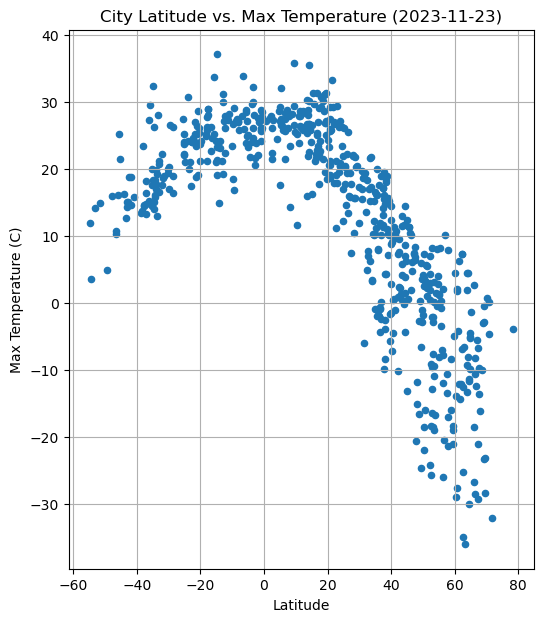

In [13]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", figsize=(6, 7), grid=True,
                  title="City Latitude vs. Max Temperature (2023-11-23)")

# Incorporate the other graph properties
plt.xlabel("Latitude") 
plt.ylabel("Max Temperature (C)") 

# Save the figure
plt.savefig("output_data/Fig01.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

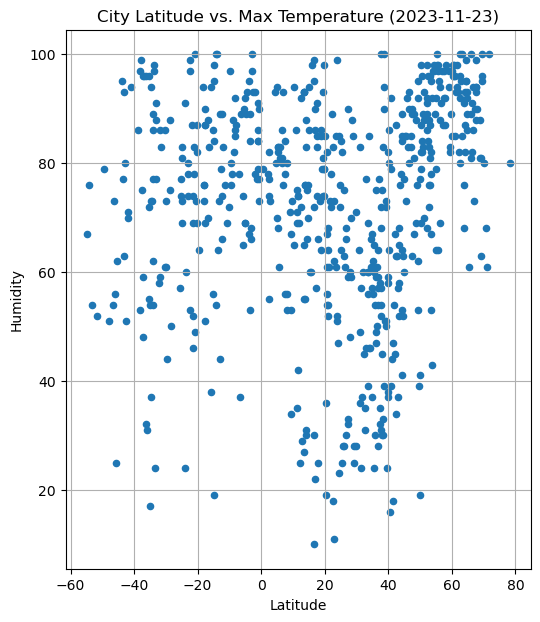

In [14]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", figsize=(6, 7), grid=True,
                  title="City Latitude vs. Humidity (2023-11-23)")

# Incorporate the other graph properties
plt.xlabel("Latitude") 
plt.ylabel("Humidity") 

# Save the figure
plt.savefig("output_data/Fig02.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

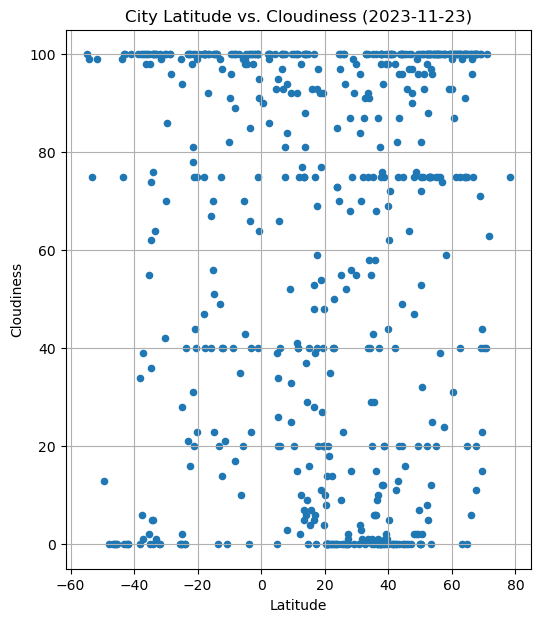

In [16]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", figsize=(6, 7), grid=True,
                  title="City Latitude vs. Cloudiness (2023-11-23)")

# Incorporate the other graph properties
plt.xlabel("Latitude") 
plt.ylabel("Cloudiness") 

# Save the figure
plt.savefig("output_data/Fig03.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

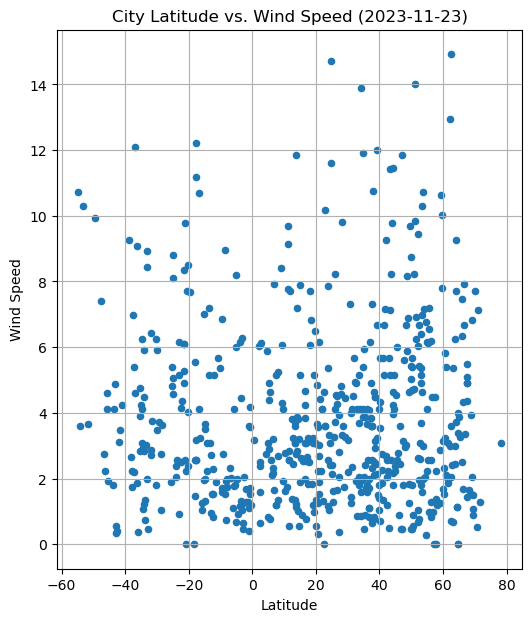

In [17]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", figsize=(6, 7), grid=True,
                  title="City Latitude vs. Wind Speed (2023-11-23)")

# Incorporate the other graph properties
plt.xlabel("Latitude") 
plt.ylabel("Wind Speed") 

# Save the figure
plt.savefig("output_data/Fig04.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,meadow lake,34.8014,-106.5436,10.26,37,1,3.87,US,1700856520
2,katsuura,35.1333,140.3000,11.18,56,43,5.95,JP,1700856520
3,kapuskasing,49.4169,-82.4331,-6.59,62,96,4.65,CA,1700856521
5,stanley,54.8680,-1.6985,2.80,79,20,4.12,GB,1700856523
7,dudinka,69.4058,86.1778,-28.39,100,15,1.08,RU,1700856524


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,25.18,83,75,9.77,CK,1700856519
4,waitangi,-43.9535,-176.5597,16.16,95,99,1.79,NZ,1700856449
6,katoomba,-33.7198,150.3074,12.88,98,100,0.73,AU,1700856524
10,invercargill,-46.4000,168.3500,10.72,73,0,2.24,NZ,1700856526
14,grytviken,-54.2811,-36.5092,3.52,76,99,3.61,GS,1700856529


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.728374017468026


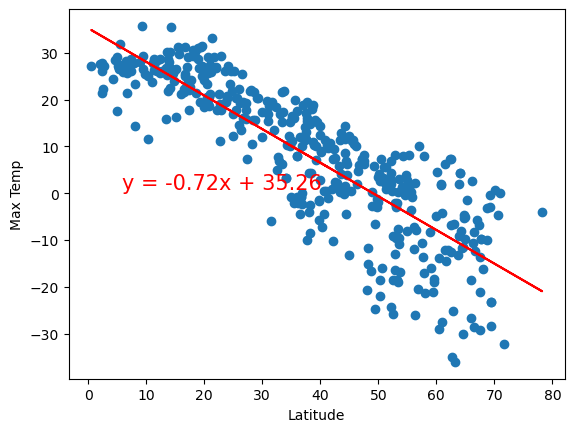

In [20]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.47429617155996673


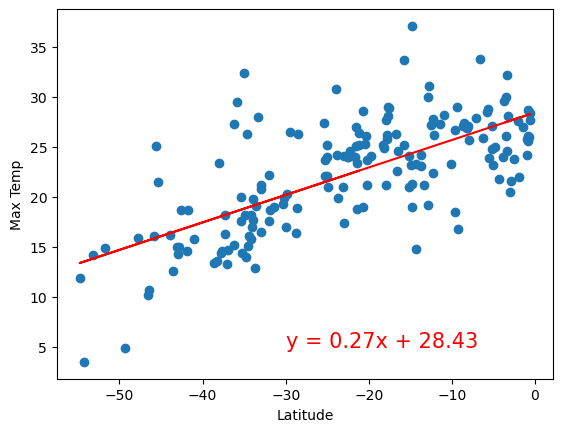

In [22]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-30, 5), fontsize=15, color="red") 
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere, the r-value is 0.7283, and in the Southern Hemisphere, it is 0.4742. These values indicate a moderate to strong positive correlation between latitude and temperature in both hemispheres. The scatter plot graphs for both hemispheres show that temperatures tend to be higher near the equator (latitudes close to 0). 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1042866259758979


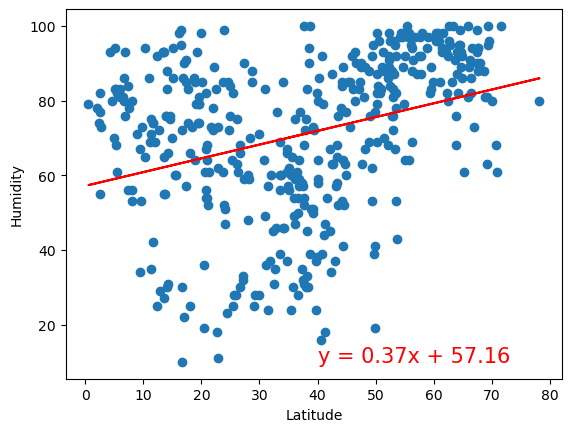

In [25]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (40,10), fontsize=15, color="red")  # Adjust position as needed
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.06409309706709349


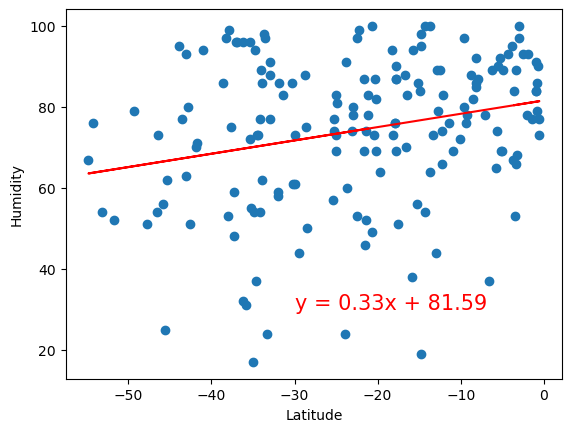

In [27]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-30, 30), fontsize=15, color="red")  # Adjust position as needed
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Northern hemisphere area r value is 0.1042 and Southern hemisphere area r value is 0.064. They both indicates a weak positive correlation between humidity and latitude. for the northern hemisphere scatter plot, humidity level is showing higher at higher latitude. Northern Hemisphere also showing a slightly higher correlation than the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.045732499854940115


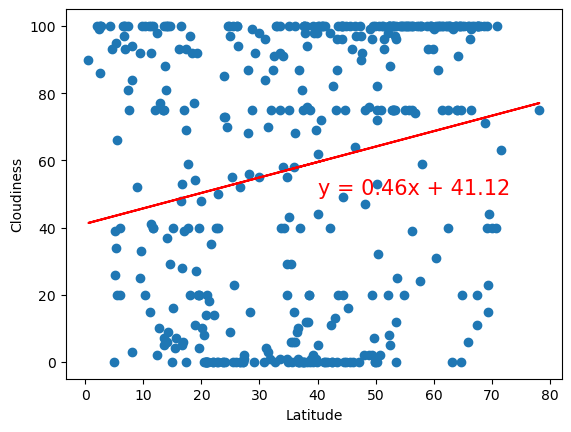

In [29]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (40,50), fontsize=15, color="red")  
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.05011680216625467


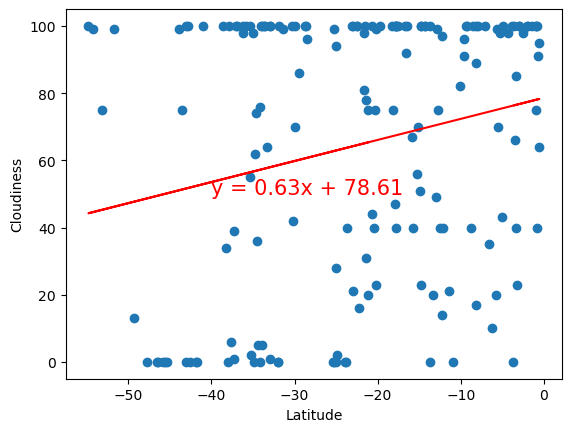

In [32]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-40, 50), fontsize=15, color="red") 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Both r values for Northern Hemisphere (0.0457) and Southern Hemisphere (0.0501) are consider a very week correlation between cloudiness and latitude. Latitude is not a strong predictor of cloudiness in either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00664408072249901


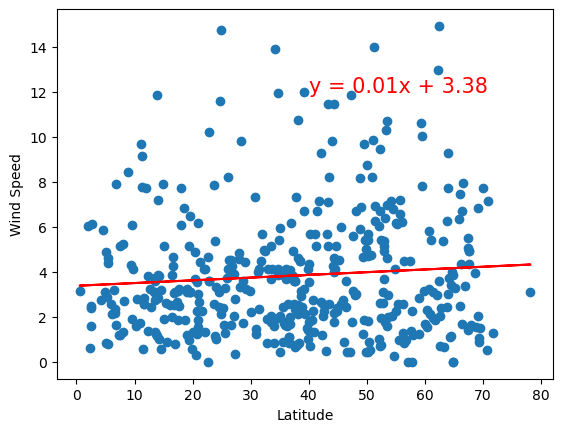

In [35]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (40,12), fontsize=15, color="red") 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.062239040700515696


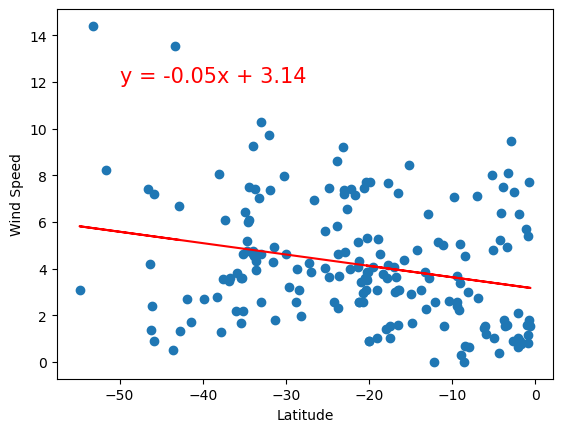

In [22]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (40,50), fontsize=15, color="red") 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Both r values for Northern Hemisphere (0.0066) and Southern Hemisphere (0.062) are consider a very very week correlation between wind speed and latitude. Latitude is not a strong predictor of wind speed in either hemisphere.